In [3]:
import uproot
import pandas as pd
import numpy as np

In [4]:
root_file_path = "~/Desktop/Root/root/myroot/Mission/tag_1_pythia8_events_103.root"

In [5]:
root_tree_path = "Delphes;1/Jet"

In [6]:
rootfile = uproot.open(root_file_path+":"+root_tree_path)
#rootfile.keys()

In [16]:
rootnp=rootfile.arrays(["Jet.Mass"],library="np")
rootnp

{'Jet.Mass': array([array([18.815002 , 18.476093 , 21.324476 ,  4.8013678,  4.596472 ,
                4.9133444,  3.230196 ], dtype=float32)                    ,
        array([ 6.635386 , 11.388695 ,  7.2518034,  3.2909136,  7.1505694,
                7.8438334,  6.2616415], dtype=float32)                    ,
        array([34.720474, 15.840665, 11.127564, 16.117907,  6.528745,  7.947644],
              dtype=float32)                                                     ,
        ...,
        array([27.205238 , 16.749277 ,  7.4869795,  6.908223 ,  6.280521 ,
                5.6410127], dtype=float32)                                ,
        array([8.728644 , 7.5504627, 4.1010523], dtype=float32),
        array([48.623466 , 20.550932 , 22.460117 , 19.641449 ,  6.9076095,
                2.7403975], dtype=float32)                                ],
       dtype=object)}

In [17]:
data = pd.DataFrame.from_dict(rootnp)
data

,Jet.Mass
0,"[18.815002, 18.476093, 21.324476, 4.8013678, 4..."
1,"[6.635386, 11.388695, 7.2518034, 3.2909136, 7...."
2,"[34.720474, 15.840665, 11.127564, 16.117907, 6..."
3,"[13.034531, 6.637744, 8.56997]"
4,"[10.302561, 8.229506, 11.955813, 10.692644, 5...."
...,...
1970,"[15.609224, 11.134039, 10.22215, 7.4368753, 7...."
1971,"[4.4039435, 11.752226, 8.854323]"
1972,"[27.205238, 16.749277, 7.4869795, 6.908223, 6...."
1973,"[8.728644, 7.5504627, 4.1010523]"


In [27]:
final_data = []
for array in data.values:
    for subarray in array:
        if len(subarray)==0:
            a = final_data.append(np.NAN)         
        else:
            for values in subarray:
                final_data.append(values)


In [19]:
final_data

[18.815002,
 18.476093,
 21.324476,
 4.8013678,
 4.596472,
 4.9133444,
 3.230196,
 6.635386,
 11.388695,
 7.2518034,
 3.2909136,
 7.1505694,
 7.8438334,
 6.2616415,
 34.720474,
 15.840665,
 11.127564,
 16.117907,
 6.528745,
 7.947644,
 13.034531,
 6.637744,
 8.56997,
 10.302561,
 8.229506,
 11.955813,
 10.692644,
 5.1398797,
 3.7351413,
 6.6754026,
 6.391225,
 10.793931,
 -4.672031e-06,
 10.759025,
 13.978428,
 13.175484,
 8.620214,
 10.187636,
 9.734524,
 6.4983907,
 4.792368,
 4.48352,
 14.894876,
 9.647628,
 6.3380146,
 8.652943,
 6.3291264,
 18.543787,
 4.9241595,
 4.7613335,
 15.844156,
 7.181684,
 28.881409,
 12.535045,
 8.384514,
 11.891422,
 4.5286164,
 3.2889588,
 12.063772,
 10.243641,
 8.371621,
 9.141263,
 8.138822,
 9.4281,
 2.4435096,
 17.097414,
 6.642304,
 7.7269664,
 18.325726,
 4.894686,
 15.036393,
 11.464452,
 7.4302797,
 4.064162,
 14.697341,
 5.405522,
 7.1894107,
 3.6546924,
 3.4235063,
 7.5612907,
 5.8140936,
 4.760227,
 18.62627,
 2.946628,
 12.547701,
 4.53694

In [20]:
particle = pd.DataFrame(final_data)
particle_ = particle.fillna(0)
particle_

,0
0,18.815002
1,18.476093
2,21.324476
3,4.801368
4,4.596472
...,...
9056,20.550932
9057,22.460117
9058,19.641449
9059,6.907609


array([[<AxesSubplot: title={'center': '0'}>]], dtype=object)

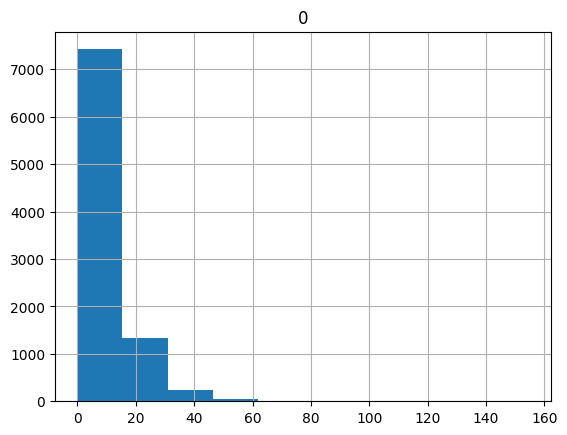

In [21]:
particle_.hist()

In [23]:
#If you want to see mean of values
data_ = data["Jet.Mass"].apply(np.mean)

In [24]:
old = pd.DataFrame(data_)
mean = old.fillna(0)
mean

,Jet.Mass
0,10.879564
1,7.117549
2,15.380501
3,9.414082
4,8.342591
...,...
1970,10.423621
1971,8.336831
1972,11.711875
1973,6.793386


array([[<AxesSubplot: title={'center': 'Jet.Mass'}>]], dtype=object)

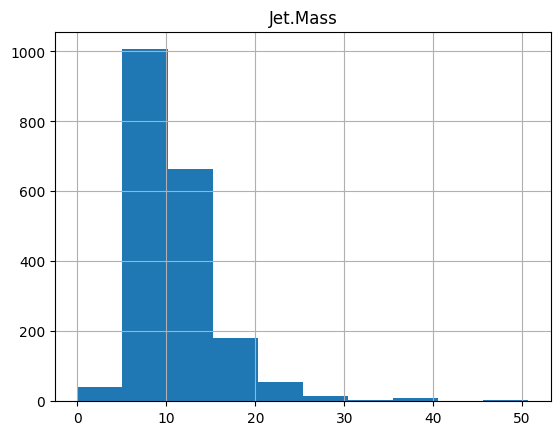

In [25]:
mean.hist()

In [63]:
#new.value_counts()

In [63]:
new.to_csv(r'~/Desktop/Root/root/myroot/Mission/Jet/pt.txt', header=False, sep=' ')

In [167]:
new.to_csv(r'~/Desktop/Root/root/myroot/Mission/Photon/phi.txt',header=False, sep=' ')

In [153]:
new.to_csv(r'~/Desktop/Root/root/myroot/Mission/Photon/pt.txt',header=False, sep=' ')

In [171]:
particle_.to_csv(r'~/Desktop/Root/root/myroot/Mission/Jet/btag.txt', header=False, sep=' ')